In [18]:
import matplotlib.pyplot as plt
import numpy as np
#import scipy
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import cx_Oracle

In [19]:
con = cx_Oracle.connect('Tapasya/nanu_stsci@127.0.0.1/xe')
cur = con.cursor()
obj = cur.execute('''select freq_A, freq_T, freq_GC from beeGenes''')
freqA = []
freqT = []
freqGC = []
for x in obj:
    freqA.append(x[0])
    freqT.append(x[1])
    freqGC.append(x[2])
    


#lengthList=len(lx)
a=np.array(freqA).astype(float)
t=np.array(freqT).astype(float)
gc=np.array(freqGC).astype(float)


    


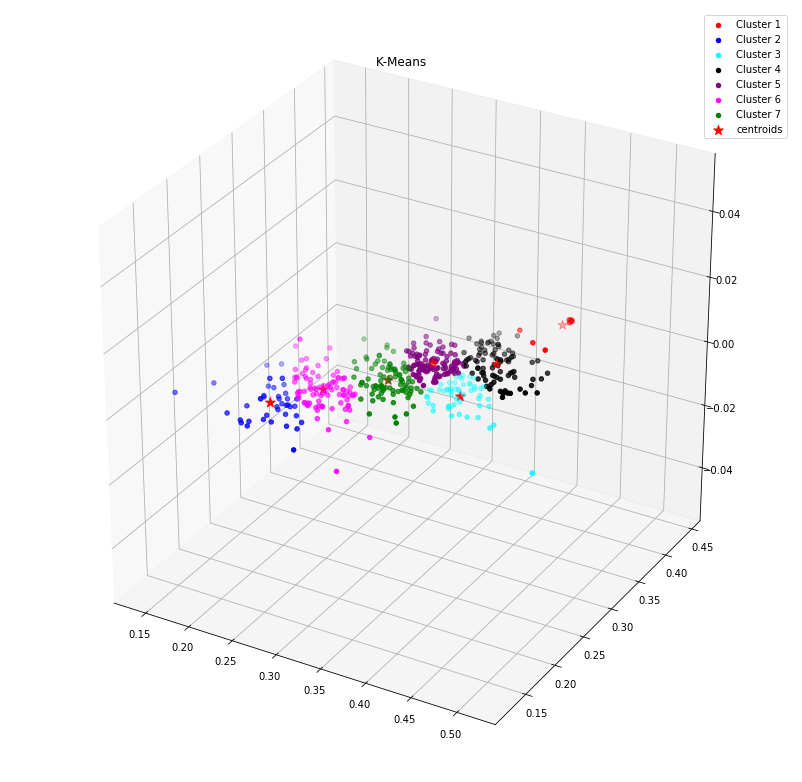

In [25]:
lengthList=len(freqA)
X=np.empty((lengthList,3))
#print X
X[:,0]=a
X[:,1]=t
X[:,2]=gc

fig = plt.figure(figsize=(14, 14))
ax = fig.gca(projection='3d')

km=KMeans(n_clusters=7,init='random',n_init=10,max_iter=500,tol=1e-04,random_state=0)  #K-Means clustering
y_km=km.fit_predict(X)
plt.scatter(X[y_km==0,0],X[y_km==0,1],s=20,c='red',marker='o',label='Cluster 1')

plt.scatter(X[y_km==1,0], X[y_km==1,1],s=20,c='blue',marker='o',label='Cluster 2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],s=20,c='aqua',marker='o',label='Cluster 3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],s=20,c='black',marker='o',label='Cluster 4')
plt.scatter(X[y_km==4,0],X[y_km==4,1],s=20,c='purple',marker='o',label='Cluster 5')
plt.scatter(X[y_km==5,0],X[y_km==5,1],s=20,c='magenta',marker='o',label='Cluster 6')
plt.scatter(X[y_km==6,0],X[y_km==6,1],s=20,c='green',marker='o',label='Cluster 7')

#plt.text(3.5,2.5,r'2')
#plt.scatter(X[y_km==3,0],X[y_km==3,1],s=50,c='pink',marker='o',label='mrx')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,marker='*',c='red',label='centroids')

plt.legend(loc=1)
plt.title('K-Means')
plt.grid()
plt.show()

